<a href="https://colab.research.google.com/github/dearmypoem/2022-2-ITB/blob/main/itb_%EB%B6%84%EB%A5%98_%EA%B3%BC%EC%A0%9C_2116504_%EA%B9%80%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **독립변수들에 의한 당뇨 여부(종속변수) 분류**

In [ ]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
## 인코딩으로 해결되지 않는 한글 깨짐 현상으로 인한 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [137]:
## 폰트 적용
import matplotlib.pyplot as plt
plt.rc("font", family="NanumBarunGothic") 

In [138]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", encoding = "UTF8")

## 엑셀로 데이터 전처리(일부 이전 시각화 과제와 동일)

## 결측 데이터가 많은 행/열, 같은 값만 제시된 일자 관련 항목 제거
## 흡연상태, 음주여부 결측치는 최빈값으로 보간
## 신장 데이터, 체중 데이터 결합하여 BMI 항목 추가
## 식전혈당 데이터 이용하여 당뇨여부 항목 추가, 수치가 126보다 높은 경우 당뇨여부 1 부여
## 흡연상태(아니오, 예), 음주여부(아니오, 예)는 (0,1)로 대체, 흡연상태의 'NotNow'는 2로 대체

display(health.head())
print(health.info())
print(health.describe())

,신장(5Cm단위),체중(5Kg 단위),흡연상태,음주여부,BMI,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),당뇨여부,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,165,60,0,0,22.038567,72.1,127,79,90,0,15.0,1.1,21,27,21
1,150,65,0,0,28.888889,81.0,110,73,87,0,12.7,0.5,18,15,15
2,155,55,0,0,22.892820,70.0,123,80,102,0,12.8,0.7,27,25,7
3,160,70,0,0,27.343750,90.8,134,84,146,1,16.4,1.2,65,97,72
4,155,50,0,0,20.811655,75.2,144,89,110,0,12.4,0.7,18,17,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   9912 non-null   int64  
 1   체중(5Kg 단위)  9912 non-null   int64  
 2   흡연상태        9912 non-null   int64  
 3   음주여부        9912 non-null   int64  
 4   BMI         9912 non-null   float64
 5   허리둘레        9912 non-null   float64
 6   수축기혈압       9912 non-null   int64  
 7   이완기혈압       9912 non-null   int64  
 8   식전혈당(공복혈당)  9912 non-null   int64  
 9   당뇨여부        9912 non-null   int64  
 10  혈색소         9912 non-null   float64
 11  혈청크레아티닌     9912 non-null   float64
 12  (혈청지오티)AST  9912 non-null   int64  
 13  (혈청지오티)ALT  9912 non-null   int64  
 14  감마지티피       9912 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 1.1 MB
None
         신장(5Cm단위)   체중(5Kg 단위)         흡연상태         음주여부          BMI  \
count  9912.000000  9912.000000  9912.000000  9912.000000  9912.00

# 의사결정나무

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.iloc[:, 4:8]
y = health.iloc[:, 9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.998
시험용 데이터 정확도: 0.817


In [140]:
## 파라미터 변경

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.905
시험용 데이터 정확도: 0.900


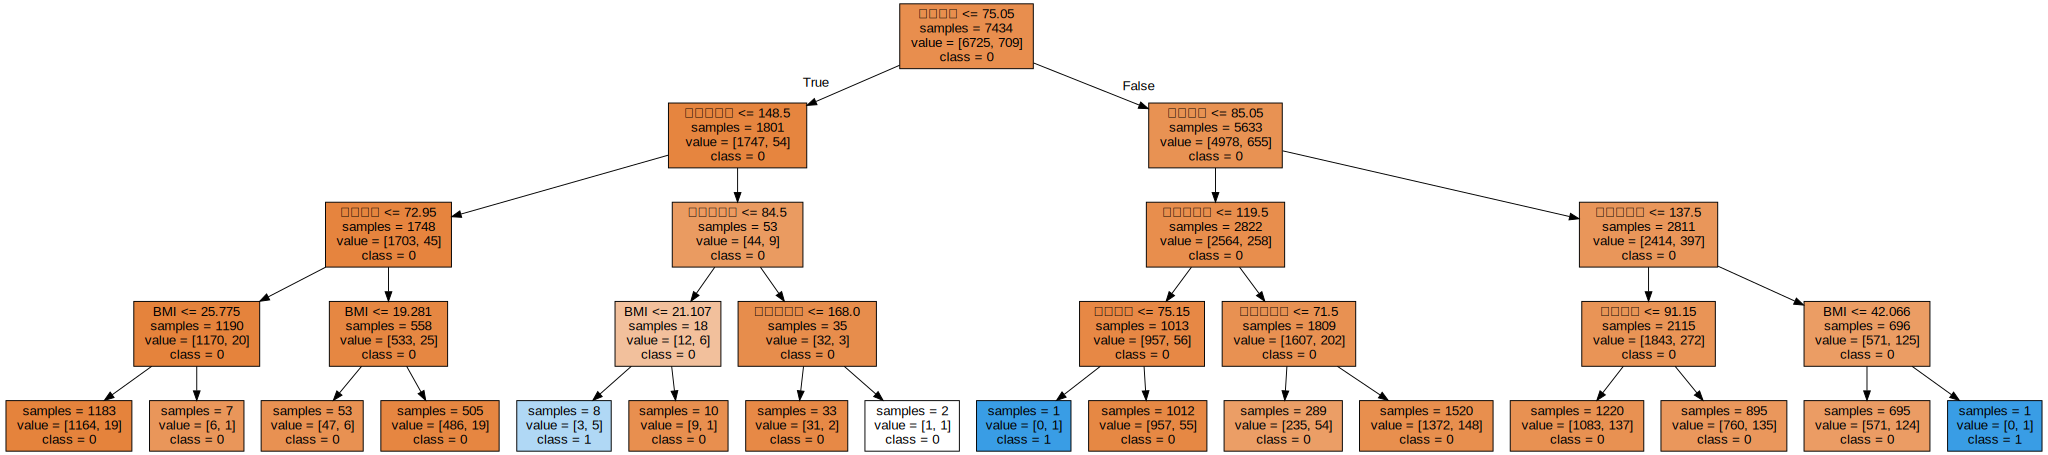

In [141]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
                feature_names=health.columns[4:8], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# 랜덤 포레스트

In [142]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.997
시험용 데이터 세트 정확도: 0.894


# 그래디언트 부스팅

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.906
시험용 데이터 세트 정확도: 0.900


In [144]:
## 파라미터 변경

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.905
시험용 데이터 세트 정확도: 0.901


# 분류 모델 평가(정오분류표)

In [145]:
## 교차 검증

from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.90456989 0.90322581 0.90322581 0.90322581 0.90578735 0.90444145
 0.90309556 0.90444145 0.90444145 0.90444145]
Random forest:  [0.89650538 0.89516129 0.89784946 0.8938172  0.90444145 0.89905787
 0.90040377 0.89502019 0.8923284  0.90174966]
Gradient boosting:  [0.90456989 0.90456989 0.90322581 0.90322581 0.90578735 0.90444145
 0.90444145 0.90444145 0.90444145 0.90444145]
Accuracy mean
Decision tree :0.904
Random forest :0.898
Gradient boosting :0.904


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
gbrt_pred = gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

0    2232
1     246
Name: 당뇨여부, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.900
[[2230    2]
 [ 246    0]]
Random forest 시험용 데이터 세트 정확도:0.894
[[2211   21]
 [ 241    5]]
Gradient boosting 시험용 데이터 세트 정확도:0.901
[[2232    0]
 [ 246    0]]


# 최적의 분류 모델 선택

의사결정나무와 그래디언트 부스팅 거의 유사한 정확도를 보여주었다.

두 모델 중 그래디언트 부스팅이 근소하게 더 높은 정확도로 분류하였으며,

파라미터의 경우 max_depth = 2 를 적용한 경우가 적합하였다.

# 인사이트 도출

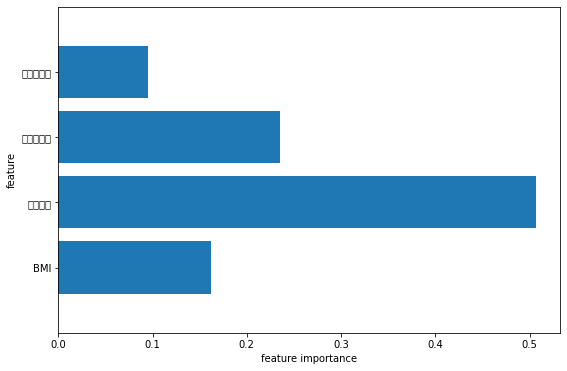

In [ ]:
def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[4:8]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), health.columns[4:8])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_health(gbrt)

중요도 도출 결과 결과 허리둘레가 가장 중요한 변수로 작용하였다.

따라서, 허리둘레가 높은 시민들에게 당뇨 검사 및 당뇨에 대한 주의 및 관리를 제안할 수 있다.